# Stone-Weiertrass theorem and Randomized Neural Networks
The content is modified from the [sildes](https://people.math.ethz.ch/~jteichma/lecture_ml_web/lecture1_SW_UAT_2022.pdf) and [lecture 2](https://gist.github.com/jteichma/ea5e54b772a0a3ec5633cbd90e1a3f5f).

## Weierstrass approximation theorem
Recall in freshman Calculus, we proved Weierstrass approximation theorem in homework:

**Theorem** Suppose $f$ is a continuous real-valued function defined on the real interval $[a, b]$. For every $\varepsilon>0$, there exists a polynomial $p$ such that for all $x\in[a, b]$, we have $|f(x) − p(x)| < \varepsilon$. That is, polynomials are dense in $C([0,1])$.

**Proof** Fejer's theorem + Taylor expansions of $sin(x)$ and $cos(x)$. $\blacksquare$

**Theorem** (Fejer) Let $f:\mathbb{R}\to\mathbb{R}$ be a $2\pi$-periodic continuous function on $\mathbb{R}$. Then, the Cesaro sum of its Fourier series $F_N=\frac{1}{N+1}(f_0+\cdots+f_N)$ converges uniformly to $f$ on $\mathbb{R}$, where $$ f_m(x)=c+\sum_{n=1}^m (a_n cos(nx)+b_nsin(nx)). $$

## Berstein approximation
A Berstein polynomial of type $(n,k)$ is $$ B_{n,k}(x)={n\choose k}x^k(1-x)^{n-k}\quad (k=0,1,...,n) .$$ 

**Theorem** For every continuous $f$ on $[0,1]$ can be uniformly approximated by the following polynomial
$$ B^f_n(x)=\sum_{k=0}^n f(\frac{k}{n})B_{n,k}(x). $$

**Proof** Let $(X_i)_{i=1}^N$ be a sequence of i.i.d. Bernoulli random variables with parameter $x\in[0,1]$. Write $S_n=(X_1+\cdots+X_n)/n$. We have $P(X_1+\cdots+X_N)=B_{n,k}(x)$ and $B^f_n(x)=E[f(\frac{S_n}{n})]=\sum_{k=0}^nf(\frac{k}{n})B_{n,k}(x)$. Since $f$ is continous on a closed interval $[0,1]$,$f$ is uniformly continous; that is, for a fixed $\varepsilon>0$, there exists $\delta>0$ such that if $|x-y|<\delta$, then $|f(x)-f(y)|<\varepsilon/2$. Let $M=\sup_{x\in[0,1]} |f(x)|$. Then,

\begin{align*} 
|B^f_n(x)-f(x)| & =|E[f(\frac{S_n}{n})-f(x)]|\leq E|f(\frac{S_n}{n})-f(x)| \\
                & \leq \varepsilon/2+2MP(|\frac{S_n}{n}-x|>\delta) & \text{$f(x)<M$} \\
                & \leq \varepsilon/2+2M\frac{E|\frac{S_n}{n}-x|^2}{\delta^2} & \text{Chebyshev's Inequality} \\
                & = \varepsilon/2+2M\frac{Var(S_n/n)}{\delta^2} \\
                & = \varepsilon/2+2M\frac{x(1-x)/n}{\delta^2} \\
                & \leq \varepsilon/2+\frac{2M}{n\delta^2} & \text{$p(1-p)<1$}
\end{align*}
Choose $N=ceil({\frac{4M}{\varepsilon\delta^2}})+1$ so that for $n\geq N$, $\frac{2M}{n\delta^2}<\varepsilon/2$. $\blacksquare$

## Stone–Weierstrass theorem
Marshall H. Stone considerably generalized the theorem. His result is also known as the **Stone–Weierstrass theorem**. 

*algebra over a field (or algebra): a vector space equipped with a bilinear form

**Theorem** Suppose $X$ is a compact Hausdorff space and $A$ is a subalgebra of $C(X,\mathbb{R})$ which contains a non-zero constant function. Then $A$ is dense in $C(X,\mathbb{R})$ if and only if it separates points.

This implies Weierstrass approximation theorem because polynomials on $[0,1]$ form a subalgebra of $C[0,1]$ and polynomials are point seperating.

*point seperating simply means that for every two points $x\neq y$ there is a function $f\in A$ such that
$f (x)\neq f(y)$.

## Approximation by Signature
### Weighted spaces
Consider weighted spaces $(E,\rho)$, i.e. topological Hausdorff spaces with $\rho:E\to\mathbb{R}_{\geq 1}$ such that ${\rho\leq R}$ is compact for all $R$.

We consider the closure $B_{\rho}(E)$ of bounded continuous functions $C_b(E;\mathbb{R}) = C_b(E)$ with respect to the $\rho$-norm
$$\|f\|_{\rho}=\sup_x \frac{|f(x)|}{\rho(x)}.$$

### Stone Weierstrass approximation theorem for weighted spaces $E$
Let $A$ a point separating subalgebra of $B_{\rho}(E)$ such that for a point separating subspace $\tilde{A}\subset A$ the function $exp(|I|) \in B_{\rho}(E)$ for $I\in\tilde{A}$. Then $A$ is dense in $B_{\rho}(E)$.

### Signature on $\text{Lip}([0, 1]; \mathbb{R}^d )$
Lipschitz curves (starting at 0) are a dual space of a Banach space (see work of Nigel Kalton and Sten Kaijser) and carry therefore a weak-∗-topology, which constitutes a weighted space $(E,\rho)$ where we take $\rho(u) = exp(\|u\|^2_\text{Lip})$.

For every Lipschitz curve $u$ starting at 0 we can define signature of the curve extended by time, whose span provides us with a point separating subalgebra $A$ of $B_{\rho}(E)$ satisfying the condition that $exp(|I(u)|)\in B_{\rho}(E)$ for all $I \in E$. Whence $A$ is dense in $B_{\rho}(E)$.

### New result
Randomized signature can be considered a path space counterpart of a randomly initialized shallow networks.

## Randomized Neural Network
Consider a controlled ODE
$$ dX_t=\sum_{i=1}^d V_i(X_{t-})du^i(t),\quad X_0=x\in\mathbb{R}^N $$
where $V_i$ are smooth vector fields on $\mathbb{R}^m$.

A solution of this equation is given by a fixed point of
$$ X_t=x+\sum_{i=1}^d \int_0^t  V_i(X_{s-})du^i(s),\quad \text{for }t\geq 0. $$

In this case the Euler scheme, which approximates the solution of the ODE, is an iterative procedure where maps of the type
$$ x\to x+\sum_{i=1}^d V_i(x)\Delta u^i(t)$$
at point $x\in\mathbb{R}^N$ at $t\geq 0$. Obviously one can understand such finite concatenations as deep neural networks with at most $m+N$ neurons in each layers and depths being equal to the time discretization with respect to the ODE's initial value.

- $t,t+1,t+2,...$ $\sim$ layer0, layer1, layer2 $,...$
- Each layer corresponds to a time step
- As $t\to\infty$, the solution (i.e. iteration, Euler's method) converges.
### Conclusion (Skip lots of derivations)
A generic choice of vector fields $V_i$ of the above controlled system can be realized by random neural networks and a certain number of controls $u^1,...,u^d$ leads to an infinite depth neural network with $m+N$ nodes on each layer which can approximate any continuous function on a compact set.

*depth of NN: number of layers

In [3]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

0


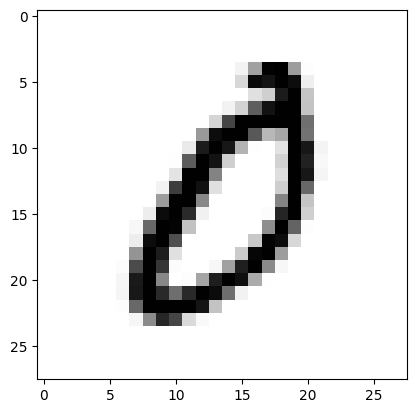

In [3]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython
image_index = np.random.randint(60000) #7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is printed
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [2]:
x_train.shape[0]
# 60000 images in x_train

60000

In [6]:
x_train.shape[1:]
# 28*28 pixels for each image

(28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
# array with 60000 elements, each element is an image with 28*28 black-white pixels 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

Architecture of a CNN
![Architecture of a CNN.png](<attachment:Architecture of a CNN.png>)
[(Source)](https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html)
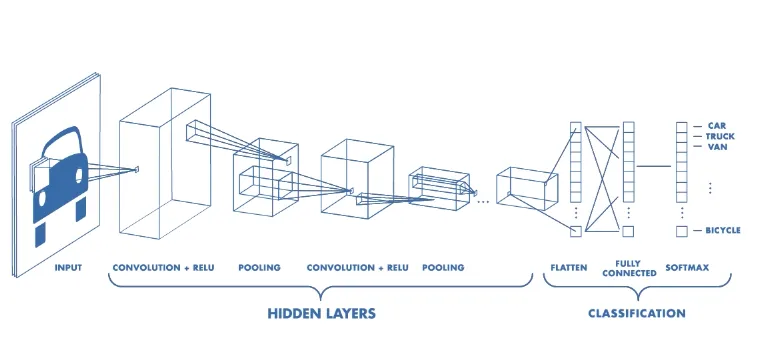

Artificial neuron
![artificial neuron.png](<attachment:artificial neuron.png>)
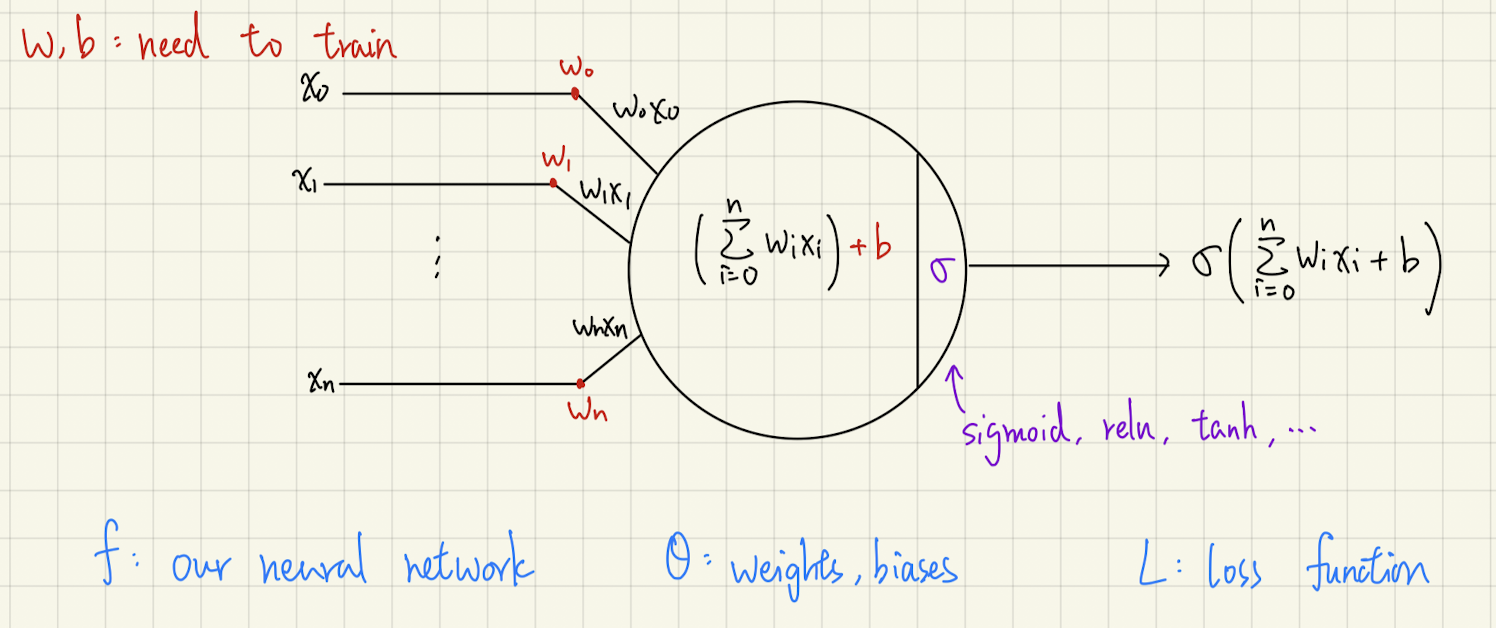

#### Dense: 
- output = activation(dot(input, kernel) + bias), 'activation' is componentwise
- kernel: weight matrix
- bias: bias vector

In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
layer1.trainable=True
model.add(layer1) # (3,3) for mnist
model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2) for mnist
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')#glorot_uniform is by default
layer2.trainable=True#False
model.add(layer2)
#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)
model.add(Dropout(0.2))  # avoid overfitting
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train,y=y_train, epochs=1)
    x = model.evaluate(x_test, y_test)
    print('\n',x)

313/313 [==============================] - 1s 4ms/step - loss: 0.4340 - accuracy: 0.9332

 [0.4340210556983948, 0.9332000017166138]


**Remark** Very fast

### Randomized Neural Network
$$ dX_t=\sum_{i=1}^d V_i(X_{t-})du^i(t) $$
We first import necessary tools.

In [1]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add
from keras.backend import constant
from keras import optimizers

#from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K

In [ ]:
m = 20*20 # dimension of state space (number of hidden nodes in each layer)
d = 2 # number of controls
N = 40 # length of the sequence of increments, number of time step

# input_shape = (28, 28, 1)
state = Input(shape=input_shape)
inputs = [state]

# If Conv2D is the first layer, we shall provide the keyword argument input_shape
state = Conv2D(28, kernel_size=(3,3),trainable=False)(state)

# Flatten the input 
# output shape should be (None,28*28)
state = Flatten()(state)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) 
# where activation is the element-wise activation function
state = Dense(m, activation='tanh',trainable=False,
              kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
              bias_initializer='random_normal')(state)
# Now 'state' is a network. We hope that this network converges to a desired classification function.

output_state = []
layers = []

Randomly choose controls $u^1,...,u^d$. Our goal is to use these random layers to approximate the classification function. 
- kernel_initializer: initialize the weights
- bias_initializer: initialize the biases
- Note that we don't train the network.

In [6]:
for j in range(N): # N=40 time steps
    for i in range(d): # d=2 controls
        layer = Dense(m, activation='tanh',trainable=False,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        layers = layers + [layer] # list operation

Vector fields

In [ ]:
for j in range(N):
    for i in range(d):
        #layer=Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
        #            bias_initializer='random_normal',
        #            name=str(i)+str(j))

        # append 'layers'
        Vx = layers[i+(j)*d](state)
        
        #Vx  = Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
        #            bias_initializer='random_normal')(state) # generation of the vector field
        #Vx  = Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer='random_normal',
        #            bias_initializer='random_normal')(Vxhelper)
        input_control_incr = Input(shape=(1,))
        helper = Dense(1, activation='linear',trainable=True,
                       kernel_initializer=initializers.RandomNormal(1,0.),
                       bias_constraint=max_norm(0.),name='u'+str(i)+str(j))(input_control_incr)
        helperlist = [helper for i in range(m)]
        delta_u = Concatenate()(helperlist) # increments vectorized       
        mult = Multiply()([Vx, delta_u]) # multiply Vx by delta_u
        state = Add()([mult,state]) # x + \sum Vx*delta_u
        inputs = inputs + [input_control_incr]
    output_state=output_state+[state]
state = output_state[-1] # latest update 
state = Dense(10, activation=tf.nn.softmax,trainable=True,
              kernel_initializer='random_uniform',
              bias_initializer='zeros')(state)
model = Model(inputs, outputs=state)

In [7]:
x_train_new = [x_train] + [1/N*np.ones((60000,1)) for i in range(N*d)]
x_test_new = [x_test] + [1/N*np.ones((10000,1)) for i in range(N*d)]
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train_new,y=y_train, epochs=1)
    x = model.evaluate(x_test_new, y_test)
    print('\n',x)

 445/1875 [======>.......................] - ETA: 18:50 - loss: 0.6758 - accuracy: 0.8097

**Remark** Too slow. 

(Code author) We realize: if we replace the well specified architecture by a random one also obtain reasonable training results (even though speed deteriorates). Of course this is an extremely generic implementation, however, it shows the effect.